# Reconnaissance de digits manuscrits par CNN

## Importation des Bibliothèques 

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm 

## Partie 1 : Base de données, Analyse et Préparation

Chargement des différentes images dans la variable **Data_test** et les labels associés dans **Label_test**.

In [2]:
path_test = os.path.join(".", "DataSet", "testing")

Data_test = []
Label_test = []

# Récursive méthode
# for root, dir_file, file in os.walk(path_test):
#     for f in file:
#         image_path = os.path.join(root,f)
#         Data_test.append(cv2.imread(image_path))

for folder in tqdm(os.listdir(path_test)):
    for file in os.listdir(os.path.join(path_test, folder
        image_path = os.path.join(path_test,folder,file)
        Data_test.append(cv2.imread(image_path))
        Label_test.append(int(folder))

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.01it/s]


Chargement des différentes images dans la variable **Data_train** et les labels associés dans **Label_train**.

In [3]:
path_train = os.path.join(".", "DataSet", "training")

Data_train = []
Label_train = []
# for root, dir_file, file in os.walk(path_train):
#    for f in tqdm(file):
#        image_path = os.path.join(root,f)
#        Data_train.append(cv2.imread(image_path))
#        Label_train.append(root.split("/")[-1])

for folder in tqdm(os.listdir(path_train)):
    for file in os.listdir(os.path.join(path_train, folder)):
        image_path = os.path.join(path_train,folder,file)
        Data_train.append(cv2.imread(image_path))
        Label_train.append(int(folder))

100%|███████████████████████████████████████████████████████████████████████████████| 10/10 [00:58<00:00,  5.90s/it]


In [4]:
print(f"Size of data\nTrain : {len(Data_train)} | Test : {len(Data_test)}")

Train : 60000 | Test : 10000


In [5]:
print(f"Size of label\nTrain : {len(Label_train)} | Test : {len(Label_test)}")

Train : 60000 | Test : 10000


## Partie 2 : Architecture CNN sur Tensorflow

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np

Création des matrices **X_train**, **X_test**, **y_train**, **y_test**, et normalisation des données.

In [7]:
X_train, X_test = np.array(Data_train)/255, np.array(Data_test)/255
y_train, y_test = np.array(Label_train), np.array(Label_test)

Affichage de quelques images et de leurs labels pour vérifier que tout va bien.

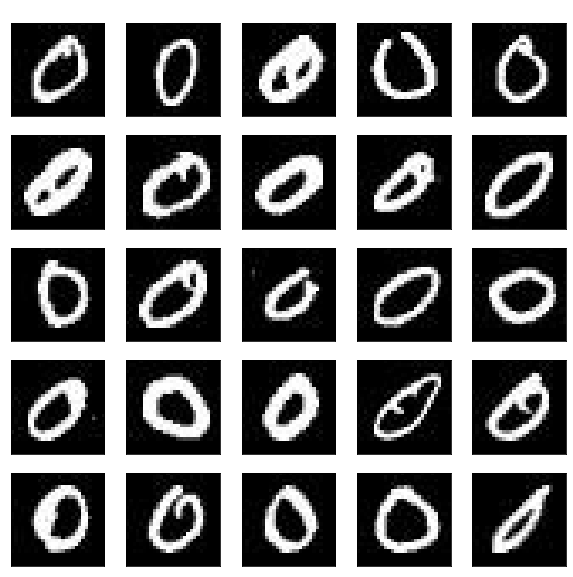

In [8]:

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.title(str(Label_train[i]), color="w")
plt.show()


In [9]:
image_shape = X_train[0].shape
print(image_shape)

(28, 28, 3)


Construction du modèle CNN avec 3 couches de convolution, 2 couches de maxpooling, 1 couche dense et la couche de sortie.

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=image_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))

# Ajout des couches denses
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(10))

# Résumé du model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

## Compilation et entraînement du modèle

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 124s 65ms/step - loss: 0.5811 - accuracy: 0.8120 - val_loss: 0.0981 - val_accuracy: 0.9715
Epoch 2/10
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0836 - accuracy: 0.9759 - val_loss: 0.0570 - val_accuracy: 0.9835
Epoch 3/10
1875/1875 [==============================] - 123s 66ms/step - loss: 0.0564 - accuracy: 0.9829 - val_loss: 0.0422 - val_accuracy: 0.9865
Epoch 4/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0416 - accuracy: 0.9873 - val_loss: 0.0453 - val_accuracy: 0.9846
Epoch 5/10
1875/1875 [==============================] - 126s 67ms/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0334 - val_accuracy: 0.9888
Epoch 6/10
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.0397 - val_accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 121s 64ms/step - loss: 0.0231 - accuracy: 0.9928 - val_loss: 0

## Evaluation du modèle

Affichage de la courbe de coût.

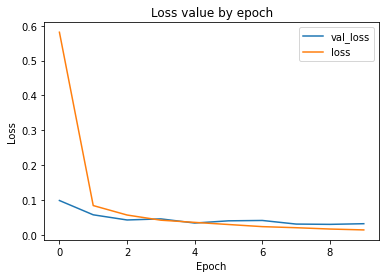

In [12]:
plt.plot(history.history['val_loss'], label = "val_loss")
plt.plot(history.history['loss'], label = "loss")
plt.xlabel('Epoch')
plt.ylabel("Loss")
plt.legend(loc = "upper right")
plt.title("Loss value by epoch")

plt.show()

Affichage de la courbe d'*accuracy*.

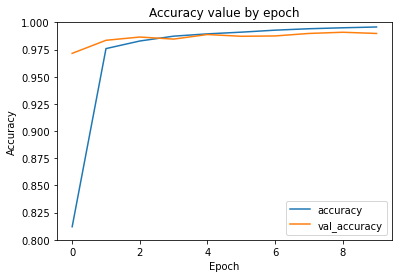

313/313 - 5s - loss: 0.0315 - accuracy: 0.9898 - 5s/epoch - 15ms/step


In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.80, 1])
plt.legend(loc='lower right')
plt.title("Accuracy value by epoch")

plt.show()

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)


In [17]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=-1)

In [18]:
y_pred[2000]

1

Calcul et affichage de la matrice de confusion.

In [19]:
confusion_matrix = tf.math.confusion_matrix(
    y_test,
    y_pred,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

In [20]:
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    0,    0,    0,    1,    0,    2,    1,    1,    0],
       [   0, 1132,    1,    1,    0,    0,    1,    0,    0,    0],
       [   2,    1, 1023,    1,    1,    0,    0,    4,    0,    0],
       [   0,    0,    2, 1004,    0,    2,    0,    2,    0,    0],
       [   0,    0,    1,    0,  976,    0,    0,    0,    1,    4],
       [   1,    0,    0,   13,    0,  872,    1,    1,    1,    3],
       [   5,    4,    0,    0,    5,    1,  942,    0,    1,    0],
       [   0,    1,    1,    2,    0,    0,    0, 1023,    0,    1],
       [   2,    1,    1,    4,    1,    0,    1,    2,  959,    3],
       [   0,    0,    0,    0,    7,    2,    0,    6,    2,  992]])>

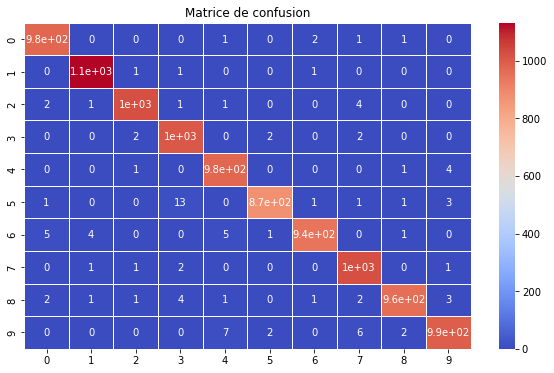

In [21]:
import seaborn as sn

plt.figure(figsize=(10,6))
sn.heatmap(confusion_matrix, annot=True,cmap='coolwarm', linecolor='white', linewidths=1)
plt.title("Matrice de confusion")
plt.show()

## Test sur des images manuscrites dessiner sur Gimp 

In [22]:
lst_file = os.listdir(os.path.join(".","test_manuscrit"))
lst_file

['1.jpg', '2.jpg', '8.jpg']

In [23]:
image_test = cv2.imread(os.path.join(".","test_manuscrit",lst_file[2]))
image = np.expand_dims(np.array(image_test), axis=0)
image.shape

(1, 28, 28, 3)

In [24]:
prob = model.predict(image)
print(prob)
print("========================")
prediction = prob.argmax(axis = -1)
print(f'{prediction = }')

[[-7.0854235 -3.892568  -1.8547627 -1.4706504 -4.984683  -4.31761
  -3.2022653 -5.763718   7.55657   -7.958385 ]]
prediction = array([8], dtype=int64)


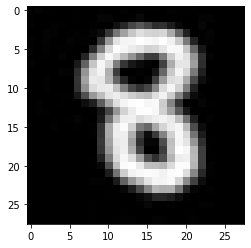

In [25]:
plt.imshow(image_test)
plt.show()